In [3]:
!pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

     |████████████████████████████████| 28.4 MB 48 kB/s eta 0:00:019


In [4]:
data1 = pd.read_csv('a1_data/a1_d1.csv', header=None)

In [5]:
x1 = data1[data1.iloc[:,-1] == 0].iloc[:,:-1]
x2 = data1[data1.iloc[:,-1] == 1].iloc[:,:-1]
print(x1)
m1 = np.array(np.mean(x1))
m2 = np.array(np.mean(x2))

m1_m2 = m1-m2.reshape(1,2)
m1_m2T = m1_m2.reshape((-1,1))
B = np.dot(m1_m2T,m1_m2)    # B represents Sb
s_mat = []
for elem in np.array(x1-m1):
    t = np.dot((elem.reshape((-1,1))), elem.reshape(1,2))
    s_mat.append(t)
S = np.zeros((x1.shape[1], x1.shape[1]))  # S represents Sw
for i in s_mat:
    S += i
s_mat = []
for elem in np.array(x2-m2):
    t = np.dot((elem.reshape((-1,1))), elem.reshape(1,2))
    s_mat.append(t)
for i in s_mat:
    S += i

            0         1
2    1.169815 -1.072747
3    0.631926 -0.255663
6   -0.386518 -0.698542
8   -0.578622 -1.482781
9    0.250082 -1.134510
..        ...       ...
988 -0.959684 -0.789318
989 -0.403834 -1.141732
991  0.666740 -0.727093
995 -1.226337 -0.507286
997 -0.317336 -0.357282

[500 rows x 2 columns]


In [6]:
Sinv = np.linalg.inv(S)
Sinv_B = Sinv.dot(B)
eigval, W = np.linalg.eig(Sinv_B)
eigval, W = zip(*sorted(zip(eigval, W)))
W = W[-1]
print('Weight vector: {}'.format(W))

Weight vector: [ 0.03029751 -0.99945382]


In [7]:
projc1 = np.dot(x1,W) / np.dot(W.T,W)
projc2 = np.dot(x2,W) / np.dot(W.T,W)
mu, sigma = norm.fit(projc1)
mu2, sigma2 = norm.fit(projc2)

Separation point: 0.15151515151515138


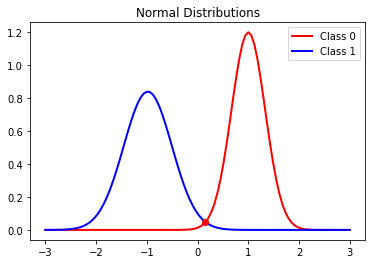

In [8]:
xmin, xmax = [-3,3]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
q = norm.pdf(x, mu2,sigma2)
plt.plot(x, p, 'k', color='red',linewidth=2, label='Class 0')
plt.plot(x, q, 'k',color='blue',linewidth=2, label='Class 1')
idx = np.argwhere(np.diff(np.sign(p - q))).flatten() # Find separation point
sep_pt = x[idx[0]]
print('Separation point: {}'.format(sep_pt))
plt.plot(x[idx], p[idx], 'ro')
plt.legend()
plt.title('Normal Distributions')
plt.show()

In [9]:
x = []
y = []
for index, rows in data1.iterrows(): 
    l = [rows[0], rows[1]]
    x.append(l)
    y.append(int(rows[2]))

In [ ]:
colors = ['red', 'blue']
fig, ax = plt.subplots(figsize=(8, 8))
for point, pred in zip(x, y):
    ax.scatter(point[0], point[1], color=colors[pred], alpha=0.3)
    proj = (np.dot(point, W) * W) / np.dot(W.T, W)
    ax.scatter(proj[0], proj[1], color=colors[pred], alpha=0.3)
plt.show()

In [ ]:
tp, tn = [0,0]
for elem in projc2:
    if elem < sep_pt:
        tp += 1
for elem in projc1:
    if elem >= sep_pt:
        tn +=1
fn = len(x1) - tp
fp = len(x2) - tn
print('True positives: {} \nTrue negatives: {} \nFalse positives: {} \nFalse negatives: {}'.format(tp, tn, fp, fn))

precision = tp / (tp+fp)
recall = tp / (tp + fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy: {}'.format(accuracy))
f_score = 2 * precision * recall / (precision + recall)
print('F-score: {}' .format(f_score))